In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def step_function(x):
    return np.array(x > 0, dtype=int)


def sigmoid(x):
    return 1 / (1 + np.exp(-x))


def relu(x):
    return np.maximum(x, 0)


def identity(x):
    return x

(-0.1, 1.1)

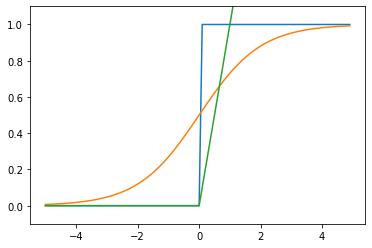

In [3]:
x = np.arange(-5.0, 5.0, 0.1)

f1 = step_function
y1 = f1(x)
f2 = sigmoid
y2 = f2(x)
f3 = relu
y3 = f3(x)

plt.plot(x, y1)
plt.plot(x, y2)
plt.plot(x, y3)

plt.ylim(-0.1, 1.1)

In [4]:
def init_network():
    network = {}
    network["W1"] = np.random.randn(2, 3)
    network["b1"] = np.random.randn(3)
    network["W2"] = np.random.randn(3, 2)
    network["b2"] = np.random.randn(2)
    network["W3"] = np.random.randn(2, 2)
    network["b3"] = np.random.randn(2)
    
    return network


def forward(network, x):
    W1, W2, W3 = network["W1"], network["W2"], network["W3"]
    b1, b2, b3 = network["b1"], network["b2"], network["b3"]
    
    a1 = x @ W1 + b1
    z1 = sigmoid(a1)
    a2 = z1 @ W2 + b2
    z2 = sigmoid(a2)
    a3 = z2 @ W3 + b3
    y = identity(a3)
    
    return y


def softmax(a):
    c = np.max(a)
    exp_a = np.exp(a - c)
    sum_exp_a = np.sum(exp_a)
    return exp_a / sum_exp_a

In [5]:
network = init_network()
x = np.random.random(2)
y = forward(network, x)
y

array([-1.25209715, -0.55858667])

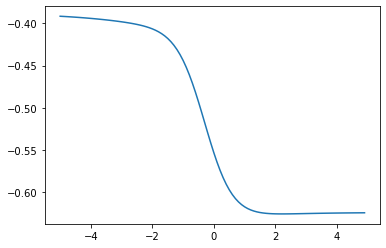

In [6]:
x = np.array([[v, 0.2] for v in np.arange(-5.0, 5.0, 0.1)])
y = forward(network, x)
plt.plot(x[:,0], y[:,1])

In [7]:
a = np.random.randn(5)
y = softmax(a)
y

array([0.35509328, 0.19780022, 0.08381189, 0.26390011, 0.0993945 ])

In [8]:
sum(y)

1.0

In [9]:
import simple_nn

In [10]:
network = simple_nn.init_network()

In [11]:
from dataset.mnist import load_mnist

In [12]:
(x_train, t_train), (x_test, t_test) = load_mnist(flatten=True, normalize=True, one_hot_label=False)

In [13]:
x_train.shape, t_train.shape, x_test.shape, t_test.shape

((60000, 784), (60000,), (10000, 784), (10000,))

In [14]:
from PIL import Image

def show_img(img):
    pil_img = Image.fromarray(np.uint8(img))
    pil_img.show()

In [15]:
img = x_train[0]
label = t_train[0]
img = img.reshape(28, 28)
# show_img(img)

In [16]:
network = simple_nn.init_network(pkl="sample_weight.pkl")

In [17]:
accuracy_count = 0
for i in range(len(x_test)):
    y = simple_nn.predict(network, x_test[i])
    p = np.argmax(y)
    if p == t_test[i]:
        accuracy_count += 1

In [18]:
f"Accuracy: {float(accuracy_count / len(x_test))}"

'Accuracy: 0.9352'

In [19]:
x_test[0].shape

(784,)

In [20]:
network["W1"].shape

(784, 50)

In [30]:
accuracy_count = 0
batch_size = 100

for i in range(0, len(x_test), batch_size):
    x_batch = x_test[i: i + batch_size]
    t_batch = t_test[i: i + batch_size]
    y_batch = simple_nn.predict(network, x_batch)
    p = np.argmax(y_batch, axis=1)
    accuracy_count += np.sum(p == t_batch)

In [31]:
f"Accuracy: {float(accuracy_count / len(x_test))}"

'Accuracy: 0.9352'

In [33]:
sum(y_batch)

array([0.39079177, 0.05217227, 0.04469452, 0.03897816, 0.05403798,
       0.02032611, 0.14146924, 0.21082105, 0.0257525 , 0.02095637],
      dtype=float32)

In [35]:
sum(sum(y_batch))

0.9999999795109034

In [36]:
def cross_entropy_error(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)

    batch_size = y.shape[0]
    return -np.sum(t * np.lop(y)) / batch_size

In [ ]:
from termios import CRPRNT


y = [0.0, 0.1, 0.9]
t = [1, 0, 0]
CRPRNT